# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN

13/10/2017

__Equipe:__
* Sayonara Santos Araújo
* Lailson Azevedo do Rego

## Resolução

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import DistanceMetric
from collections import Counter
from operator import itemgetter

In [3]:
class KNNClassifier(object):
    def __init__(self):
        self.train_data = None
        self.train_labels = None
    
    #Recebe os dados de treino
    def fit(self, train_d, train_l):
        self.train_data = train_d
        self.train_labels = train_l
    
    ##1. (Atualizada) função que mede a distância euclidiana 
    def euc_distance(self, a, b):
        dist = DistanceMetric.get_metric('euclidean')
        return dist.pairwise([a], [b]) #np.linalg.norm(a-b)

    ##2. Função que seleciona os k vizinhos mais próximos (k > 1)
    def get_neighbors(self, k, test_instance):
        distances = []
        for i in range(len(self.train_data)):
            dist = self.euc_distance(test_instance, self.train_data[i])
            distances.append((self.train_data[i], dist, self.train_labels[i]))
        distances.sort(key=itemgetter(1))
        neighbors = distances[:k]
        #print('Instancia testada: ',test_instance,'\nVizinhos: ',neighbors,'\n')
        return neighbors
    
    ##3.Função que recebe os k vizinhos mais próximos e determina a classe correta    
    def vote(self, neighbors):
        class_counter = Counter()
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        return class_counter.most_common(1)[0][0]
    
    def predict(self, k, test_data):
        votes = []
        for i in range(len(test_data)):
            neighbors = self.get_neighbors(k, test_data[i])
            v = self.vote(neighbors)
            votes.append(v)
        return votes

In [4]:
#Carrega o dataset
import pandas as pd
dataset = pd.read_csv('train_sayonara.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
#Dados faltantes em Age e Cabin
# Então, na idades faltantes, atribui a média das idades
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

# Nos dados das cabines faltantes, subistitui por SC   (Remover ou preencher?)
#dataset = dataset.dropna(axis=0, how="any")
dataset.Cabin = dataset.Cabin.fillna('SC')

In [10]:
##4. Transforma dados categóricos em numéricos (?)
cate = ['Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
datasetc=dataset
for c in cate:
    datasetc[c] = dataset[c].astype('category')
    datasetc[c] = datasetc[c].cat.codes
#dataset.dtypes
datasetc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,18,146,2
1,2,1,1,190,0,38.000000,1,0,596,207,81,0
2,3,1,3,353,0,26.000000,0,0,669,41,146,2
3,4,1,1,272,0,35.000000,1,0,49,189,55,2
4,5,0,3,15,1,35.000000,0,0,472,43,146,2
5,6,0,3,554,1,29.699118,0,0,275,51,146,1
6,7,0,1,515,1,54.000000,0,0,85,186,129,2
7,8,0,3,624,1,2.000000,3,1,395,124,146,2
8,9,1,3,412,0,27.000000,0,2,344,74,146,2
9,10,1,2,576,0,14.000000,1,0,132,154,146,0


In [11]:
##5. Normaliza os atributos numéricos
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset)
datasetn = pd.DataFrame(dataset_scaled)
datasetn.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
datasetn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,0.121348,1.0,0.271174,0.166667,0.000000,0.769118,0.072874,0.993197,1.000000
1,0.001124,1.0,0.0,0.213483,0.0,0.472229,0.166667,0.000000,0.876471,0.838057,0.551020,0.333333
2,0.002247,1.0,1.0,0.396629,0.0,0.321438,0.000000,0.000000,0.983824,0.165992,0.993197,1.000000
3,0.003371,1.0,0.0,0.305618,0.0,0.434531,0.166667,0.000000,0.072059,0.765182,0.374150,1.000000
4,0.004494,0.0,1.0,0.016854,1.0,0.434531,0.000000,0.000000,0.694118,0.174089,0.993197,1.000000
5,0.005618,0.0,1.0,0.622472,1.0,0.367921,0.000000,0.000000,0.404412,0.206478,0.993197,0.666667
6,0.006742,0.0,0.0,0.578652,1.0,0.673285,0.000000,0.000000,0.125000,0.753036,0.877551,1.000000
7,0.007865,0.0,1.0,0.701124,1.0,0.019854,0.500000,0.166667,0.580882,0.502024,0.993197,1.000000
8,0.008989,1.0,1.0,0.462921,0.0,0.334004,0.000000,0.333333,0.505882,0.299595,0.993197,1.000000
9,0.010112,1.0,0.5,0.647191,0.0,0.170646,0.166667,0.000000,0.194118,0.623482,0.993197,0.333333


In [12]:
##6. Seleciona as features baseada na correlação 
datasetn.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.065229,-0.001652,-0.056554,-0.006390,-0.035197,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.026385,0.081629,-0.164549,0.333943,-0.253658,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.078141,0.018443,0.319869,-0.724119,0.682176,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.035535,-0.049105,0.047348,-0.053846,0.062119,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.123164,-0.245489,0.059372,-0.265389,0.095991,0.118492
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.254997,-0.179191,-0.068848,0.110296,-0.234912,-0.039610
SibSp,-0.065229,-0.026385,0.078141,-0.035535,-0.123164,-0.254997,1.000000,0.423338,0.069238,0.368688,0.040687,0.069165
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.423338,1.000000,0.020003,0.361243,-0.028179,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.069238,0.020003,1.000000,-0.168153,0.243082,0.011146
Fare,-0.006390,0.333943,-0.724119,-0.053846,-0.265389,0.110296,0.368688,0.361243,-0.168153,1.000000,-0.538549,-0.169849


In [13]:
'''
Baseando-se com na correlação dos atributos com Survived, serão selecionados os atributos com correlação acima de 0.3 
  Correlação com Survived:
   Forte/Moderada: Pclass, Sex, Fare
   Fraca: Passengerid, SibSp, Embarked, Age, Name, Parch, Ticket, Fare, Cabin
'''

#Elimina os atributos irrelevantes para predição
datasetd = datasetn.drop(['PassengerId','SibSp','Embarked','Age','Name','Parch','Ticket','Cabin'], axis=1)
#datasetd

In [14]:
##7. Separa o dataset em treino (75%) / teste (25%) / validação (10% do treino)

# Separa o atributo Survived (saída) dos outros (entrada)
y = datasetd.Survived.values
X = datasetd.drop('Survived', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)

In [15]:
##8. Executa o classificador para 30 k's, pulando de 4 em 4
from sklearn import metrics
a_accuracy = []
ks = []
for k in range(3,30,4):
    knn = KNNClassifier()
    knn.fit(X_train, y_train)
    result = knn.predict(k, X_test)
    accuracy = metrics.accuracy_score(result,y_test)
    a_accuracy.append(accuracy)
    ks.append(k)

Text(0,0.5,'Acurácia')

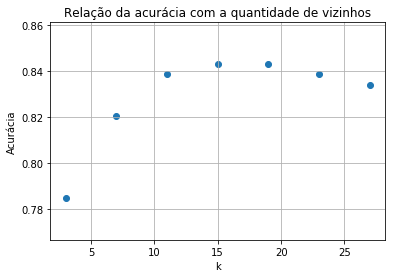

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(ks, a_accuracy, marker='o');
plt.grid()
plt.title('Relação da acurácia com a quantidade de vizinhos')
plt.xlabel('k')
plt.ylabel(u'Acurácia')

In [17]:
##9. Executa o classificar para o melhor k
# encontra melhor acuracia
index, best_accuracy = max(enumerate(a_accuracy))
print('Melhor acurácia: ',best_accuracy,' | Index:',index,
     '\nMelhor k: ',ks[index])



Melhor acurácia:  0.834080717489  | Index: 6 
Melhor k:  27


In [18]:
knn_best = KNNClassifier()
knn_best.fit(X_train, y_train)
result = knn.predict(ks[index], X_validation)
accuracy = metrics.accuracy_score(result,y_validation)
print('{0:f}'.format(accuracy))

0.835821


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, result, target_names=['Survived', 'Not Survived']))

              precision    recall  f1-score   support

    Survived       0.80      0.98      0.88        41
Not Survived       0.94      0.62      0.74        26

 avg / total       0.85      0.84      0.83        67

